<a href="https://colab.research.google.com/github/Alex880326/PythonLibrariesForDS/blob/main/Wine_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Импорт библиотек
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import missingno as msno

Изучение данных о качестве вина с помощью набора данных "WineQT.csv"  
**Вступление:**  
В этом блокноте мы намерены проанализировать данные, относящиеся к качестве вина, из набора данных "WineQT.csv". Этот набор данных предоставляет различную информацию о винах, включая плотность, кислотность, количество соли, уровень свежестит многое другое.  

Информация о наборе данных:
Этот набор данных включает следующие характеристики:  

`fixed acidity`:  Большинство кислот, участвующих в вине, являются фиксированными или нелетучими (то есть они не испаряются легко).

`volatile acidity`: Содержащееся в вине количество уксусной кислоты, которое при слишком высоких уровнях может привести к неприятному, уксусному вкусу.

`citric acid`: В небольших количествах лимонная кислота может придать вину "свежесть" и аромат.

`residual sugar`: Количество сахара, остающегося после завершения брожения, редко бывает менее 1 грамма на литр.  Вина с содержанием сахара более 45 граммов на литр считаются сладкими.

`chlorides`: Количества соли в вине.

`free sulfur dioxide`: Свободная форма SO2 существует в равновесии между молекулярным SO2 (в виде растворенного газа) и бисульфит-ионом; она предотвращает рост микроорганизмов и окисление вина.

`total sulfur dioxide` : Количество свободных и связанных форм SO2; при низких концентрациях SO2 в основном не обнаруживается в вине, но при концентрации свободного SO2 более 50 ppm SO2 становится заметным в аромате и вкусе вина.

`density`: Плотность воды близка к плотности воды в зависимости от содержания алкоголя и сахара.

`pH`: Кислотность или щелочность вина измеряется по шкале pH от 0 (очень кислая) до 14 (очень щелочная). Большинство вин имеют pH в диапазоне от 3 до 4.

`sulphates`: Добавка к вину, которая может способствовать повышению уровня диоксида серы (SO2), который действует как антимикробное и антиоксидантное средство.

`alcohol`: Процентное содержание алкоголя в вине.

`quality`: Качество (оценка от 0 до 10).

`id`: Количество уникальных строк.  

Загрузим датасет

In [ ]:
df_wine = pd.read_csv('WineQT.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
#Удалим столбец id
df_wine=df_wine.drop(['Id'], axis=1)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Проверка на наличие дубликатов
duplicates = df_wine.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4        True
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool


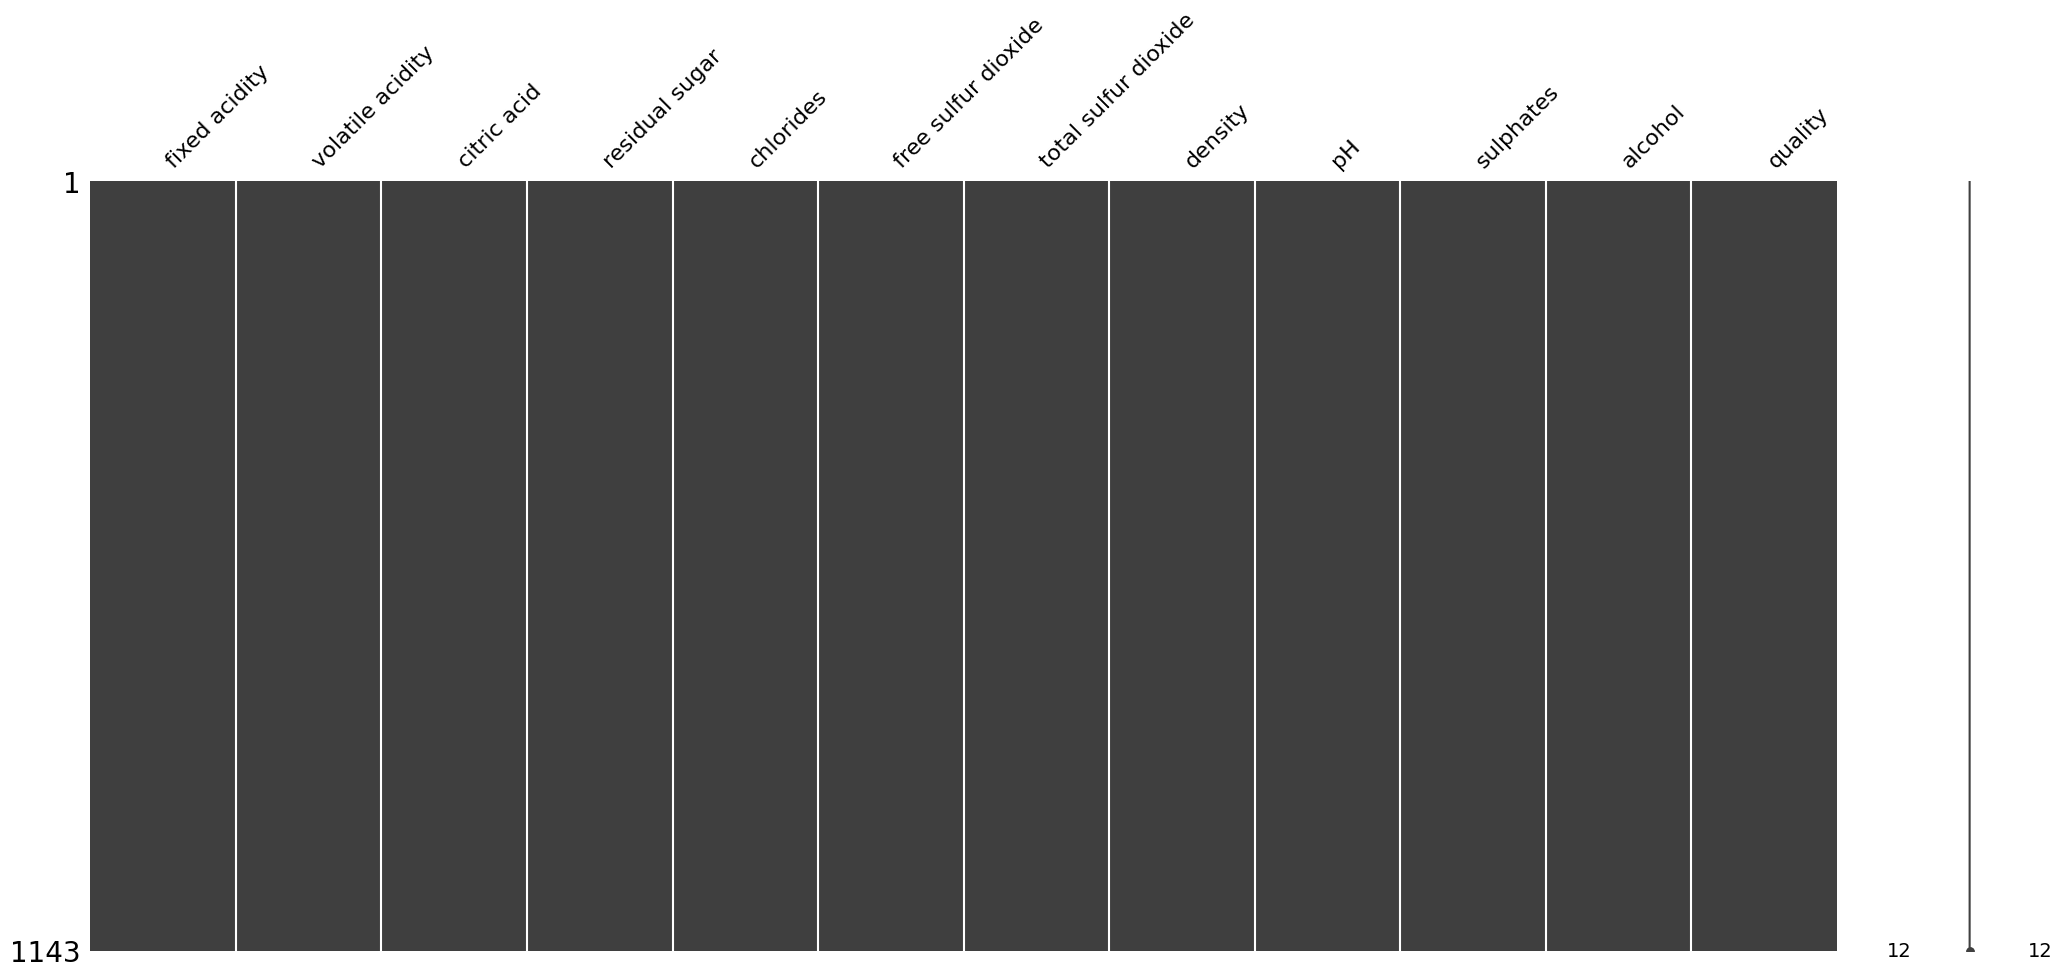

In [ ]:
#Проверка на наличие пропусков
msno.matrix(df_wine);  # Матрица пропусков

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


1. Данные состоят из 1143 наблюдений (строк) и 12 переменных (столбцов).
2. Все переменные, кроме 'quality', имеют тип данных (float64), что указывает на то, что они могут представлять собой непрерывные дискретные значения.
3. Нет пропущенных значений в данных, так как для каждой переменной количество non-null значений равно общему количеству наблюдений (1143).
5. Переменная 'quality ' является целевой переменной (зависимой переменной), которую нужно предсказывать или анализировать в зависимости от других переменных.  

Статистические характеристики признаков

In [ ]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [ ]:
#Одномерный анализ числовых переменных
#Удалим столбец id
df_wine_numeric=df_wine.drop(['quality'], axis=1)
df_wine_numeric.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


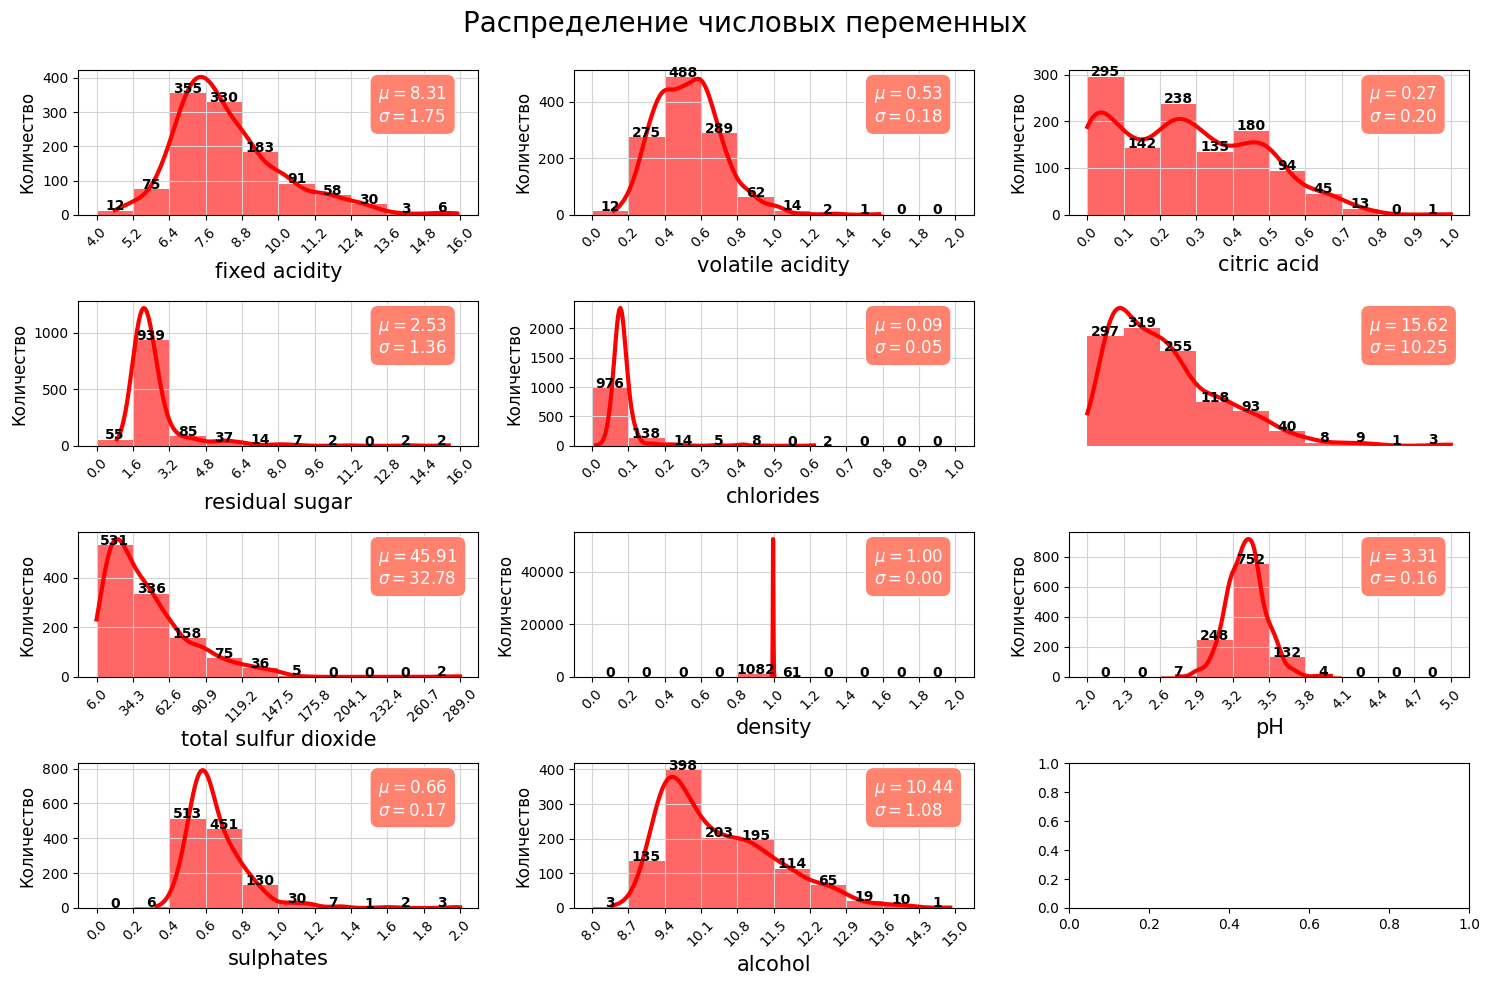

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_wine_numeric.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_wine_numeric[col],
                                     range=(np.floor(df_wine_numeric[col].min()), np.ceil(df_wine_numeric[col].max())))

    graph = sns.histplot(data=df_wine_numeric, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_wine_numeric[col].mean(),
        r'$\sigma=%.2f$' % df_wine_numeric[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

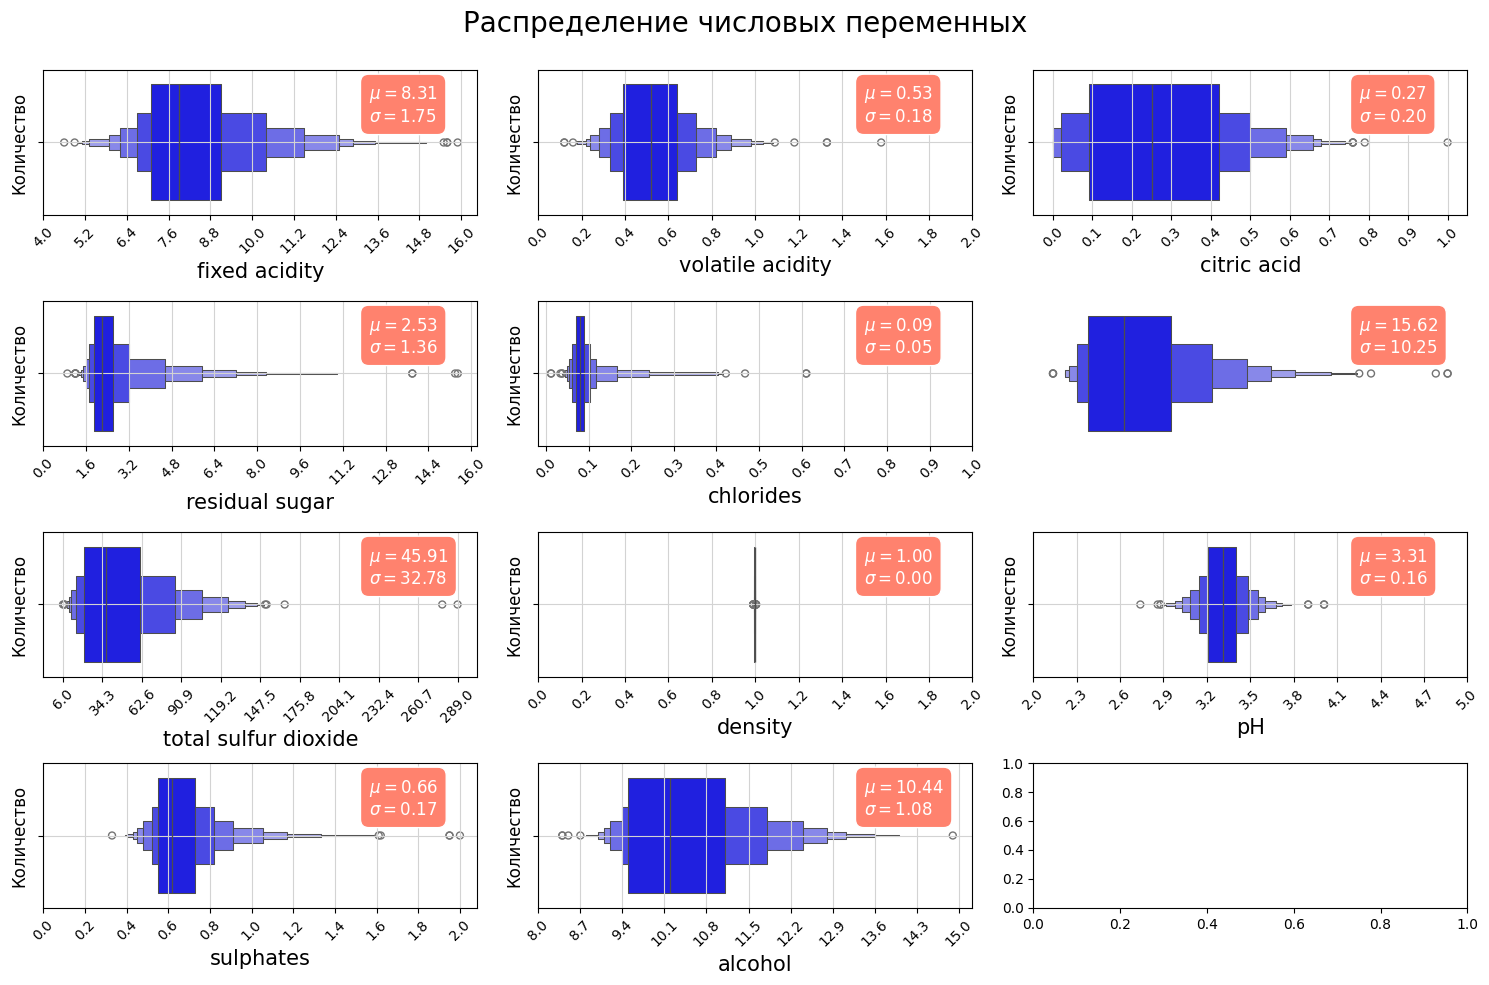

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого непрерывного признака
for i, col in enumerate(df_wine_numeric.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_wine_numeric[col],
                                     range=(np.floor(df_wine_numeric[col].min()), np.ceil(df_wine_numeric[col].max())))

    graph = sns.boxenplot(data=df_wine_numeric, x=col, ax=ax[x, y],
                         color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')


    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_wine_numeric[col].mean(),
        r'$\sigma=%.2f$' % df_wine_numeric[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

Двумерный анализ количественных признаков

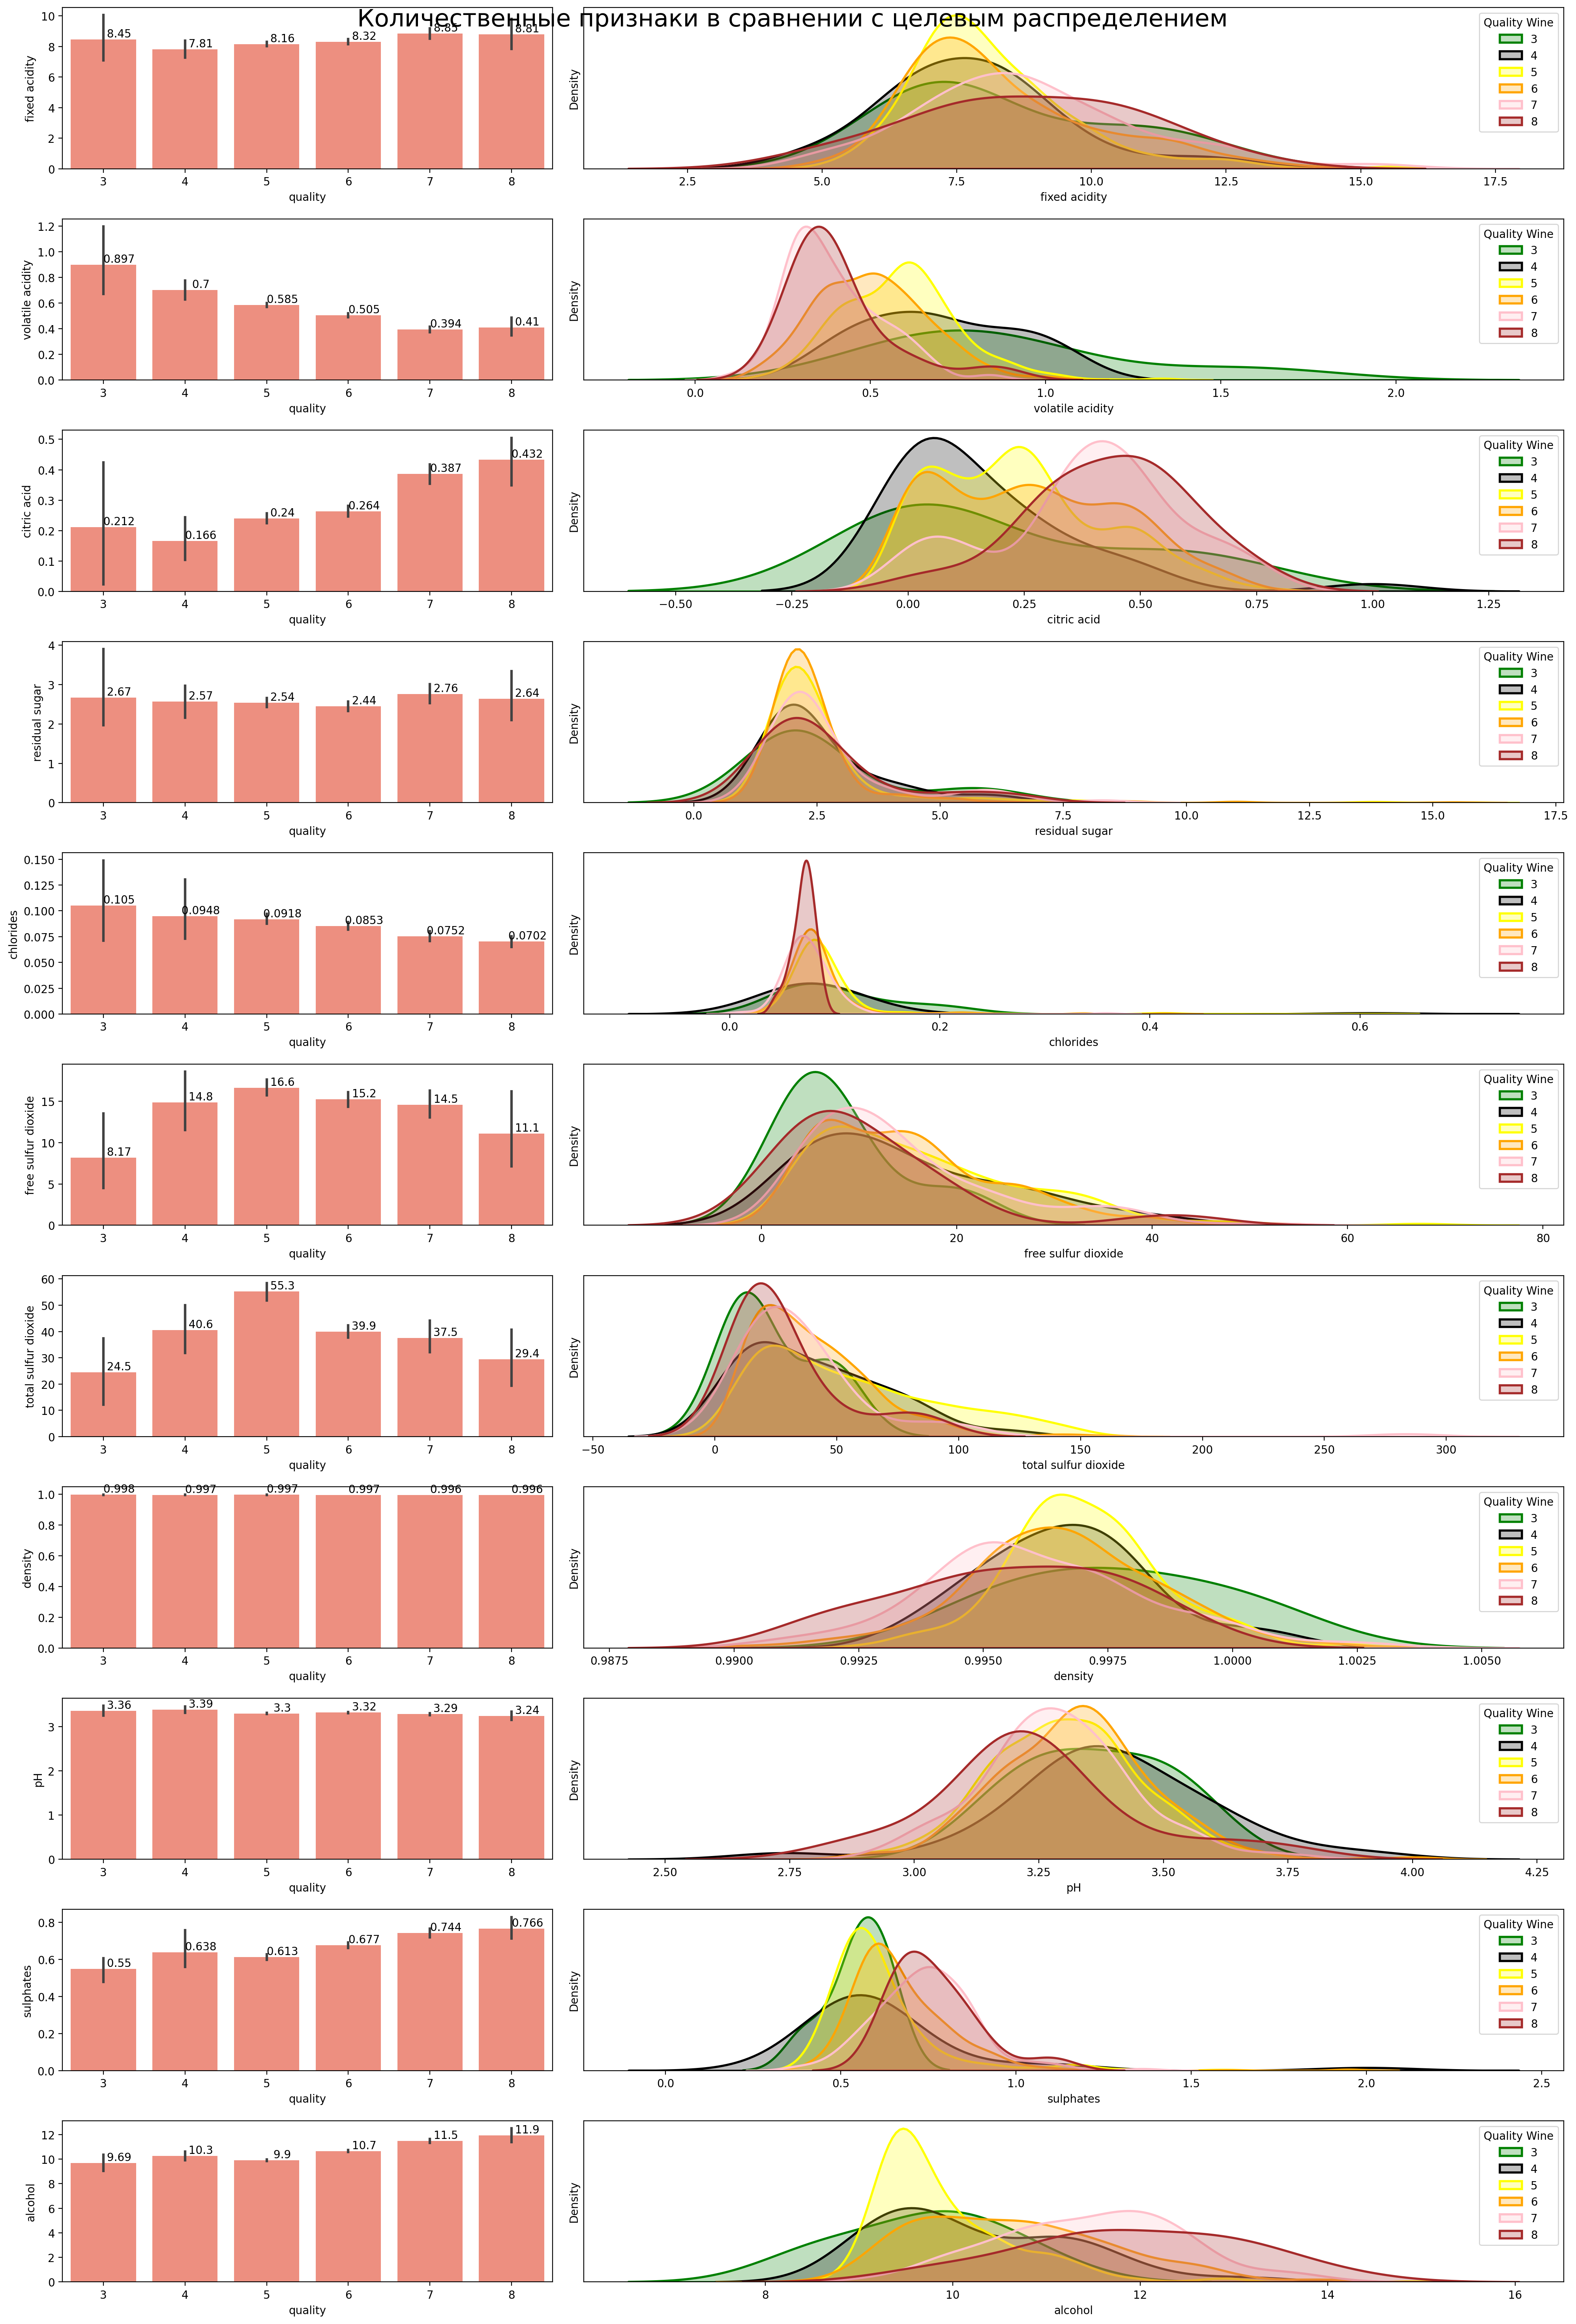

In [ ]:
# Установка цветовой палитры
sns.set_palette(['#ff826e', 'red', 'blue', 'green', 'black', 'yellow', 'orange', 'pink', 'brown', 'purple', 'white', 'gray'])

fig, axs = plt.subplots(11, 2, figsize=(20, 30), gridspec_kw={'width_ratios': [1, 2]}, dpi=200)
fig.suptitle('Количественные признаки в сравнении с целевым распределением', fontsize=22)

# Цикл для каждого численного признака для создания линейчатых диаграмм и графиков kde
for i, col in enumerate(df_wine_numeric):
    # Гистограмма, показывающая среднее значение признака для каждой целевой категории
    graph = sns.barplot(data=df_wine, x="quality", y=col, ax=axs[i, 0])

    # Средние значения в гистограмму
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

    # График KDE, показывающий распределение признака для каждой целевой категории
    sns.kdeplot(data=df_wine[df_wine["quality"] == 0], x=col, fill=True, linewidth=2, ax=axs[i, 1], label='0')
    sns.kdeplot(data=df_wine[df_wine["quality"] == 1], x=col, fill=True, linewidth=2, ax=axs[i, 1], label='1')
    sns.kdeplot(data=df_wine[df_wine["quality"] == 2], x=col, fill=True, linewidth=2, ax=axs[i, 1], label='2')
    sns.kdeplot(data=df_wine[df_wine["quality"] == 3], x=col, fill=True, linewidth=2, ax=axs[i, 1], label='3')
    sns.kdeplot(data=df_wine[df_wine["quality"] == 4], x=col, fill=True, linewidth=2, ax=axs[i, 1], label='4')
    sns.kdeplot(data=df_wine[df_wine["quality"] == 5], x=col, fill=True, linewidth=2, ax=axs[i, 1], label='5')
    sns.kdeplot(data=df_wine[df_wine["quality"] == 6], x=col, fill=True, linewidth=2, ax=axs[i, 1], label='6')
    sns.kdeplot(data=df_wine[df_wine["quality"] == 7], x=col, fill=True, linewidth=2, ax=axs[i, 1], label='7')
    sns.kdeplot(data=df_wine[df_wine["quality"] == 8], x=col, fill=True, linewidth=2, ax=axs[i, 1], label='8')
    sns.kdeplot(data=df_wine[df_wine["quality"] == 9], x=col, fill=True, linewidth=2, ax=axs[i, 1], label='9')
    sns.kdeplot(data=df_wine[df_wine["quality"] == 10], x=col, fill=True, linewidth=2, ax=axs[i, 1], label='10')
    axs[i, 1].set_yticks([])
    axs[i, 1].legend(title='Quality Wine', loc='upper right')

plt.tight_layout()
plt.show()

В датасете одна категориальная переменная 'Quality'. Рассмотрим её влияние на некоторые признаки отдельно

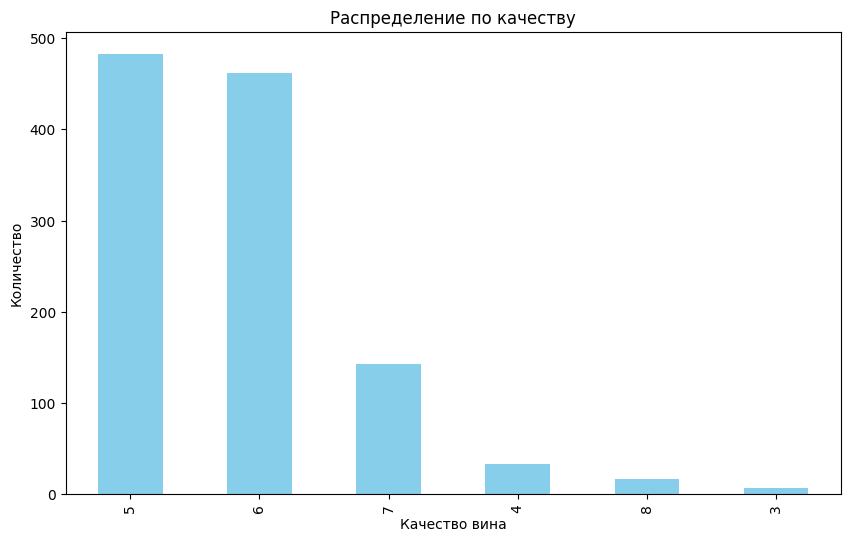

In [ ]:
# Построим столбчатую диаграмму
plt.figure(figsize=(10, 6))
df_wine['quality'].value_counts().plot(kind='bar', color='skyblue')

# Добавьте заголовок и метки осей
plt.title('Распределение по качеству')
plt.xlabel('Качество вина')
plt.ylabel('Количество')

# Покажите диаграмму
plt.show();

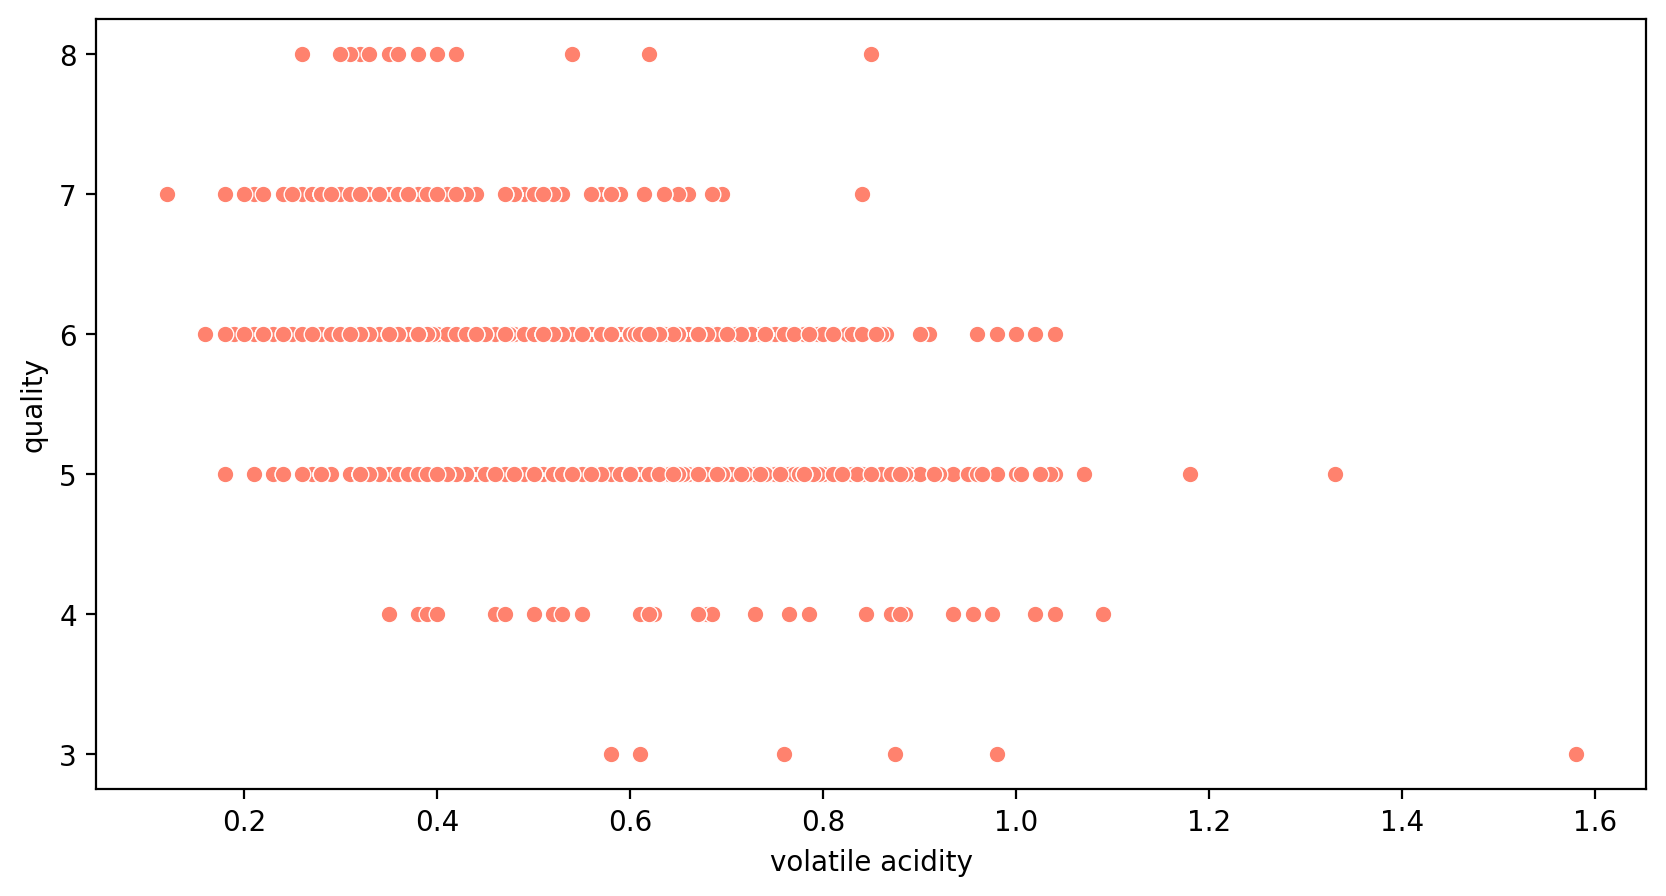

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
sns.scatterplot(x='volatile acidity', y='quality', data=df_wine)
plt.show();

Видно, что чем больше качества вина, тем меньше уксусной кислоты в нём.

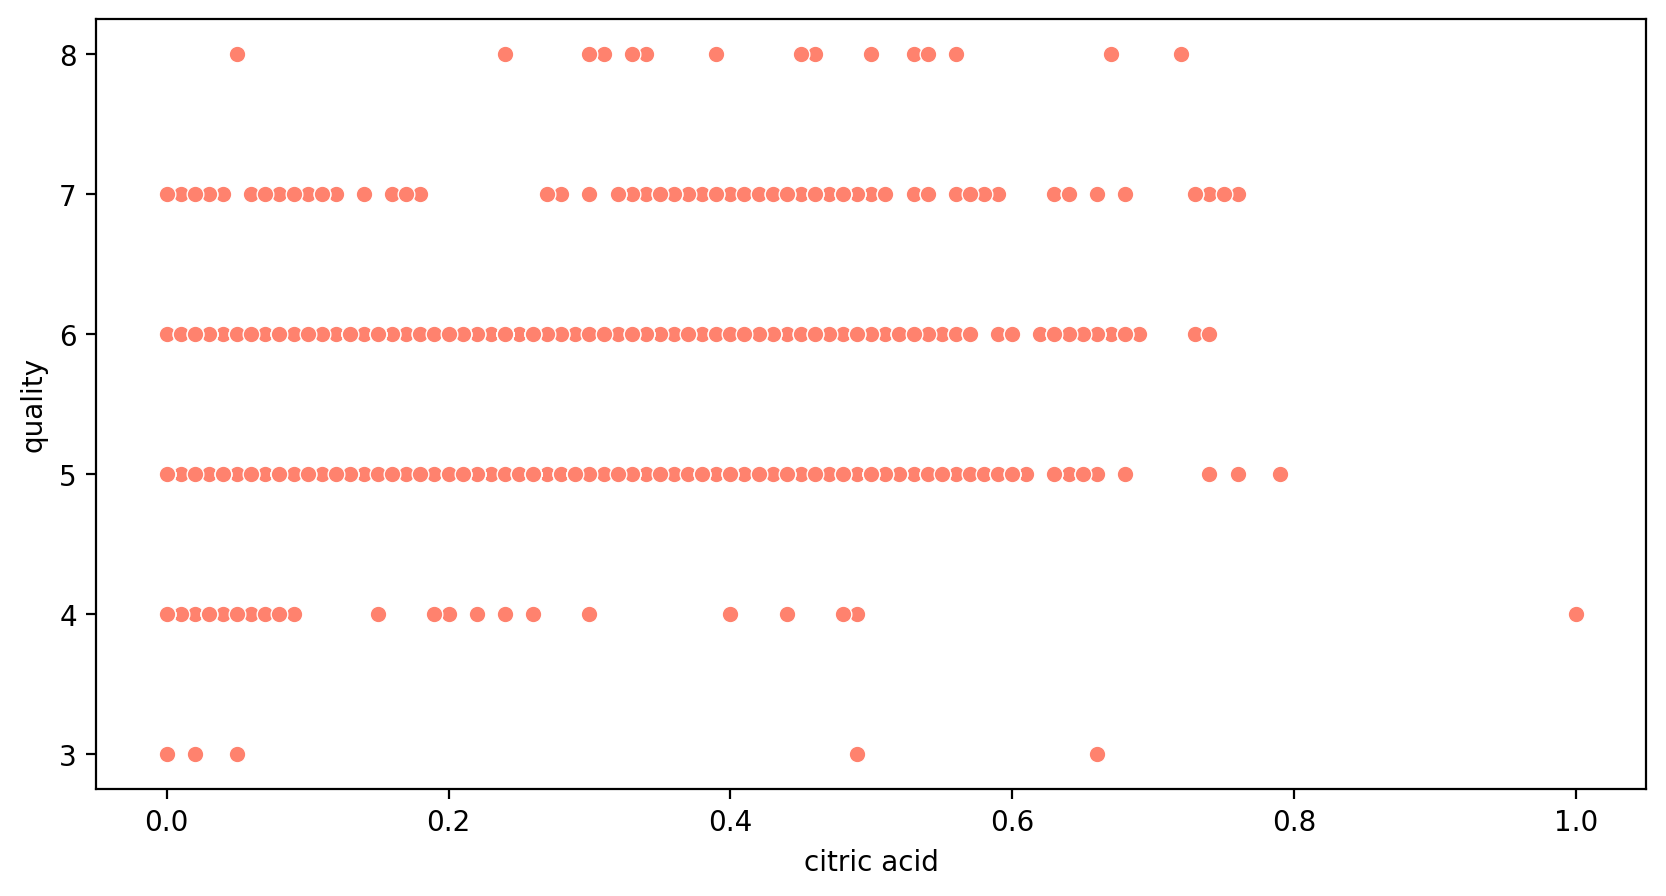

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
sns.scatterplot(x='citric acid', y='quality', data=df_wine)
plt.show();

Видно по рисунку, что лимонная кислота достаточно умеренно влияет на качество вина, так как придаёт аромат и запах.

In [ ]:
df_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


Итак сделаем вывод, что на качество вина больше всего влияют такие переменные как alcohol, sulphates, citric acid(таблица корреляции)